In [15]:

import os
import re 
import json 
import numpy as np 
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline


DIR = '/home/advit/sep7_exps/all_vars'

# Get a list of JSON files in alphabetical order
json_files = sorted([f for f in os.listdir(DIR) if f.endswith('.json')])
pattern = r'(\d+)\.json'

In [16]:
def lat_lon_to_grid(lat, lon, grid_size=(128, 256), min_lat=-90, min_lon=-180):
    """
    Convert latitude and longitude to the closest grid cell indices.

    Args:
        lat (float): Latitude in degrees.
        lon (float): Longitude in degrees.
        grid_size (tuple): The size of the grid in (rows, columns).
        min_lat (float): Minimum latitude of the grid.
        min_lon (float): Minimum longitude of the grid.

    Returns:
        tuple: Grid cell indices as (row_index, column_index).
    """
    # Calculate the cell size in degrees
    lat_step = (abs(min_lat) * 2) / grid_size[0]
    lon_step = (abs(min_lon) * 2) / grid_size[1]

    # Calculate the row and column indices
    row_index = int((lat - min_lat) / lat_step)
    column_index = int((lon - min_lon) / lon_step)

    # Ensure the indices are within the valid grid bounds
    row_index = max(0, min(grid_size[0] - 1, row_index))
    column_index = max(0, min(grid_size[1] - 1, column_index))

    return row_index, column_index

In [17]:
def gen_plot(LOC, LAT, LONG): 

    row, col = lat_lon_to_grid(LAT, LONG)

    input_la = [] 
    output_la = [] 
    pred_la = [] 

    # Loop through the JSON files
    for json_file in json_files:
        json_path = os.path.join(DIR, json_file)
        
        with open(json_path, 'r') as file:
            data = json.load(file)
            
            #print("File Name:", json_file)
            match = re.search(pattern, json_file)
            if match:
                int_match = int(match.group(1)) 
                numerical_part = match.group(1)
                data = data[0]

                output = np.array(data['output']).squeeze()
                input = np.array(data['input']).squeeze()
                prediction = np.array(data['prediction']).squeeze()

                input_la.append(input[row, col])
                output_la.append(output[row, col])
                pred_la.append(prediction[row, col])
        
            
    hours = np.arange(1, len(output_la) + 1)
    hours = hours * 6

    plt.figure(figsize=(14, 6))
    plt.plot(hours, np.array(pred_la), marker='o', linestyle='-', color='b', label='Temperature ClimaX Prediction')
    plt.plot(hours, np.array(output_la), marker='s', linestyle='-', color='r', label='Temperature Truth')
    #plt.plot(hours, np.array(input_la), marker='^', linestyle='-', color='g', label='Temperature AWI Base')

    # climax_interp = make_interp_spline(hours, np.array(pred_la), k=3)  # Cubic spline interpolation
    # awi_interp = make_interp_spline(hours, np.array(output_la), k=3)  # Cubic spline interpolation

    # # Create smoothed lines
    # hours_smooth = np.linspace(hours.min(), hours.max(), 300)  # Generate more points for smoother curve
    # climax_smooth = climax_interp(hours_smooth)
    # awi_smooth = awi_interp(hours_smooth)

    # plt.plot(hours_smooth, climax_smooth, linestyle='--', color='b', label='Smoothed ClimaX Prediction')
    # plt.plot(hours_smooth, awi_smooth, linestyle='--', color='r', label='Smoothed AWI Truth')


    plt.xlabel('Hour (Lead Time)')
    plt.ylabel('Temperature (Kelvin)')
    plt.title(f'({LOC}) Temperature Vs. Hour - ClimaX, ERA5 Truth')
    plt.grid(True)
    plt.legend()
    plt.show()

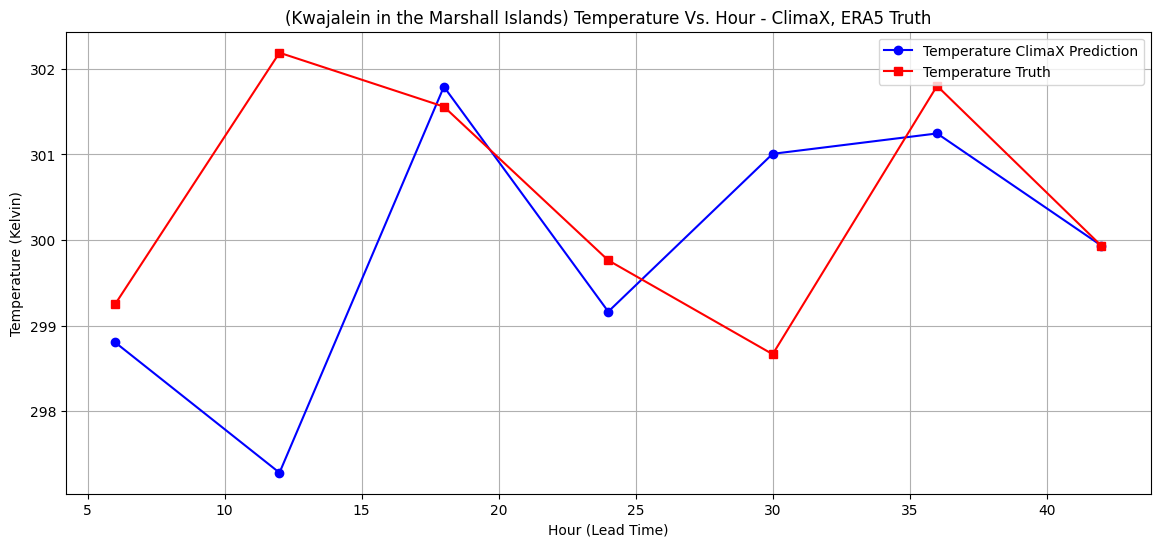

In [18]:
gen_plot("Kwajalein in the Marshall Islands", 8.43, 167.44)


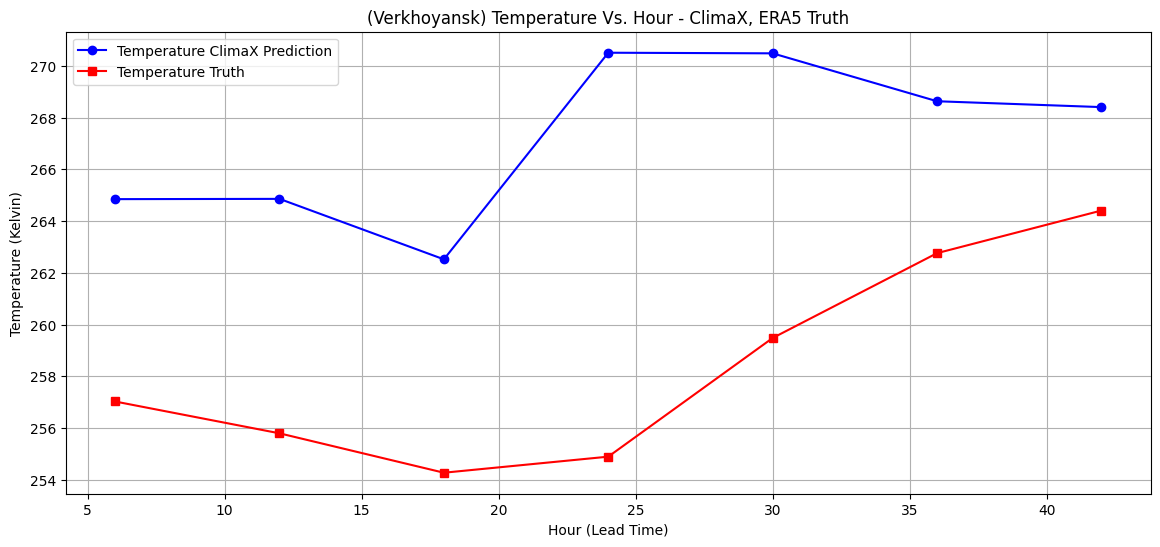

In [19]:
gen_plot("Verkhoyansk", 66.55, 133.38)


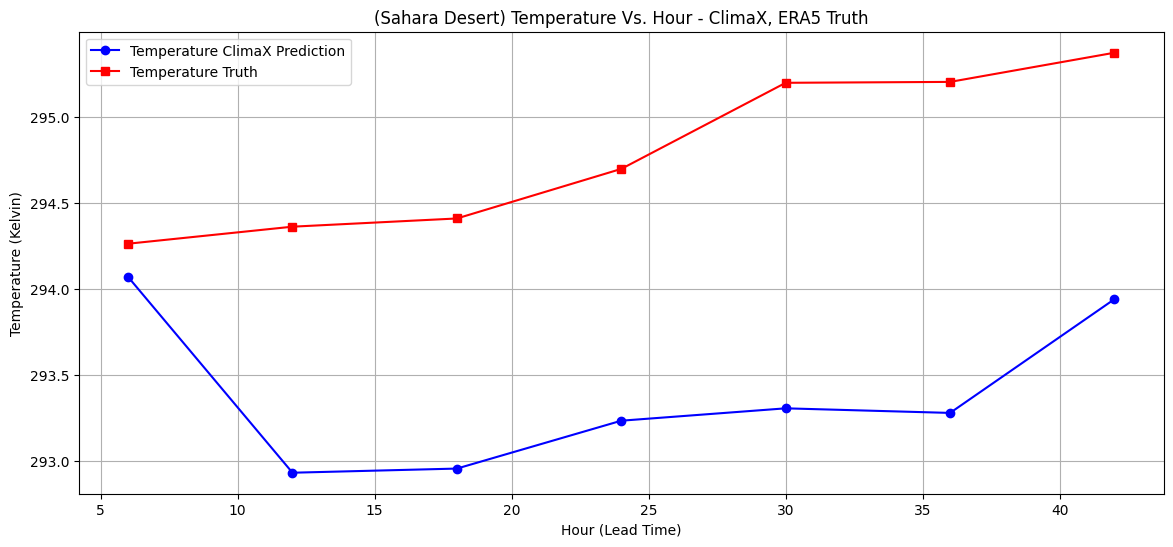

In [20]:
gen_plot("Sahara Desert", 23.41, 25.66)


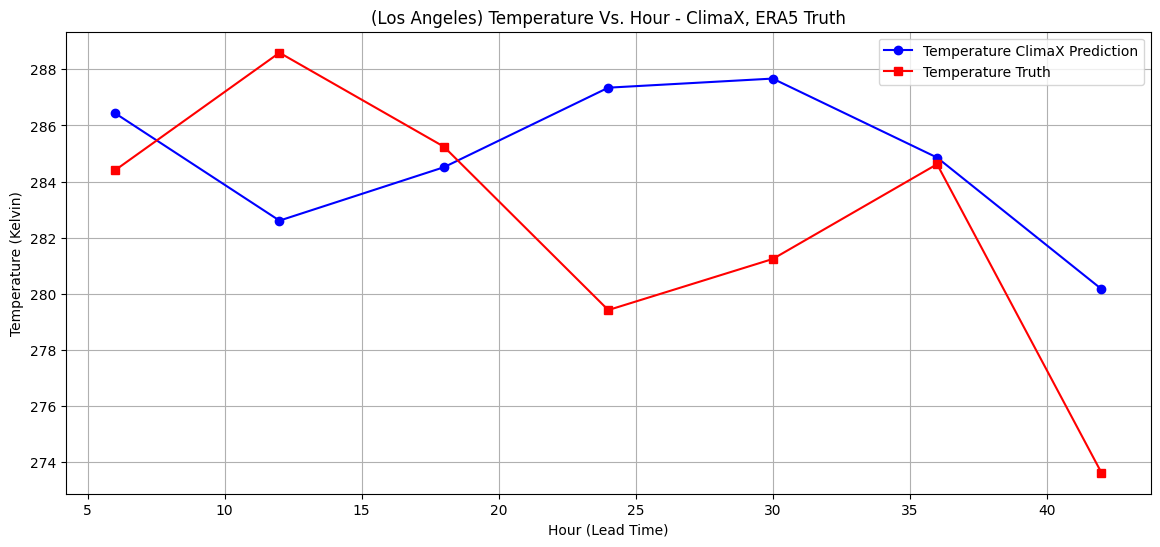

In [21]:
gen_plot("Los Angeles", 34.059, -118.2426)